## EDA for research paper: How does the relationship between AI implementation and job satisfaction differ accross businesses of varying sizes 

In [37]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

Converting the excel sheet to a csv file.

In [38]:
# Excel file
excel_file = '/Users/celinewu/Documents/Y2A_Data_Analysis/FINAL-ADSAI-knowledge_September 30, 2024_16.35.xlsx'

df = pd.read_excel(excel_file)

csv_file = 'dataset.csv'

# Convert to csv file 
df.to_csv(csv_file, index=False)

Display all the columns in the dataset 

In [39]:
# Display all columns 
pd.set_option('display.max_columns', None)

# Display full header 
pd.set_option('display.max_colwidth', 150)
df = pd.read_csv('dataset.csv')

print(df.head(1))

    StartDate   EndDate         Status   IPAddress  Progress  \
0  Start Date  End Date  Response Type  IP Address  Progress   

   Duration (in seconds)  Finished   RecordedDate   ResponseId  \
0  Duration (in seconds)  Finished  Recorded Date  Response ID   

     RecipientLastName    RecipientFirstName   RecipientEmail  \
0  Recipient Last Name  Recipient First Name  Recipient Email   

         ExternalReference   LocationLatitude   LocationLongitude  \
0  External Data Reference  Location Latitude  Location Longitude   

    DistributionChannel   UserLanguage  \
0  Distribution Channel  User Language   

                                                                                                     Q2  \
0  I have read and understood the information above and I agree to voluntary participate in this study.   

                                           Prolific-ID  \
0  What is your Prolific ID? Note: it should auto-fill   

                                                   

Select relevant columns and clean it up a bit 

In [40]:
# Drop the first row 
df = df.iloc[1:, :]

# Drop rows containing `{"ImportId"` strings, indicating metadata or placeholders
df = df[~df.apply(lambda row: row.astype(str).str.contains('ImportId').any(), axis=1)]

# Reset index after row removal
df.reset_index(drop=True, inplace=True)

# Relevant columns for analysis
columns_of_interest = ['Q20', 'Q30', 'Q8', 'Q21']

# Create DataFrame with these columns
df_analysis = df[columns_of_interest]

# Rename columns 
df_analysis.columns = [
    'Job_Satisfaction', 'Company_Size', 
    'AI_Usage_Work', 'AI_Impact_Job_Satisfaction'
]

# Display final dataset
print(df_analysis.head(10))

                     Job_Satisfaction             Company_Size  \
0  Neither satisfied nor dissatisfied   Fewer than 5 employees   
1  Neither satisfied nor dissatisfied  More than 250 employees   
2                 Extremely satisfied  More than 250 employees   
3                  Somewhat satisfied         50-100 employees   
4                  Somewhat satisfied  More than 250 employees   
5                  Somewhat satisfied          10-49 employees   
6               Somewhat dissatisfied  More than 250 employees   
7                 Extremely satisfied  More than 250 employees   
8                  Somewhat satisfied            I do not know   
9  Neither satisfied nor dissatisfied        101-250 employees   

                                  AI_Usage_Work  \
0  Yes, I have used them occasionally for work.   
1                                        Rarely   
2  Yes, I have used them occasionally for work.   
3        Yes, I use them regularly for my work.   
4                N

Unique values in the chosen columns 

In [41]:
for column in df_analysis.columns:
    unique_counts = df_analysis[column].value_counts()
    print(unique_counts)
    print("\n")

Job_Satisfaction
Somewhat satisfied                    92
Extremely satisfied                   37
Neither satisfied nor dissatisfied    27
Somewhat dissatisfied                 19
Extremely dissatisfied                 1
Name: count, dtype: int64


Company_Size
10-49 employees            52
50-100 employees           48
More than 250 employees    22
101-250 employees          19
Fewer than 10 employees    16
Fewer than 5 employees      8
1 employee                  6
I do not know               5
Name: count, dtype: int64


AI_Usage_Work
Yes, I have used them occasionally for work.    65
Yes, I use them regularly for my work.          42
No, I do not use them at work.                  35
Rarely                                          34
Name: count, dtype: int64


AI_Impact_Job_Satisfaction
AI has no impact on my job satisfaction                   69
Yes, AI has slightly improved my job satisfaction         52
Yes, AI has significantly improved my job satisfaction    29
AI tools are 

Check which rows have missing values 

In [42]:
# Display missing values
missing_rows = df_analysis[df_analysis.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)


Rows with missing values:
   Job_Satisfaction Company_Size AI_Usage_Work AI_Impact_Job_Satisfaction
33              NaN          NaN           NaN                        NaN


Since only one row has missing values I will drop that row 

In [43]:
# Drop the row with missing values
df_analysis.drop(index=33, inplace=True)

# Check whether there's any missing values now 
missing_rows = df_analysis[df_analysis.isnull().any(axis=1)]

print(missing_rows)

Empty DataFrame
Columns: [Job_Satisfaction, Company_Size, AI_Usage_Work, AI_Impact_Job_Satisfaction]
Index: []


/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_71961/143015013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis.drop(index=33, inplace=True)


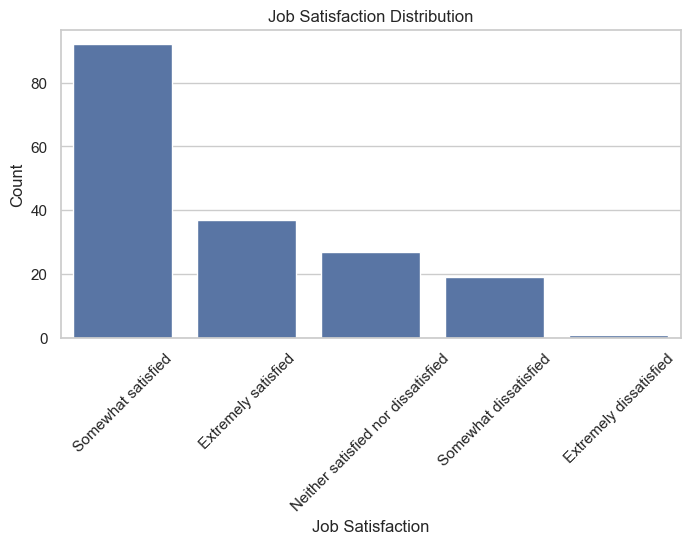

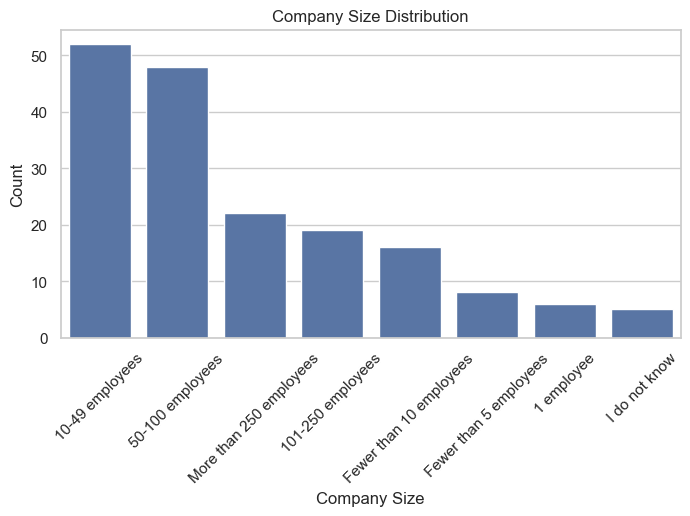

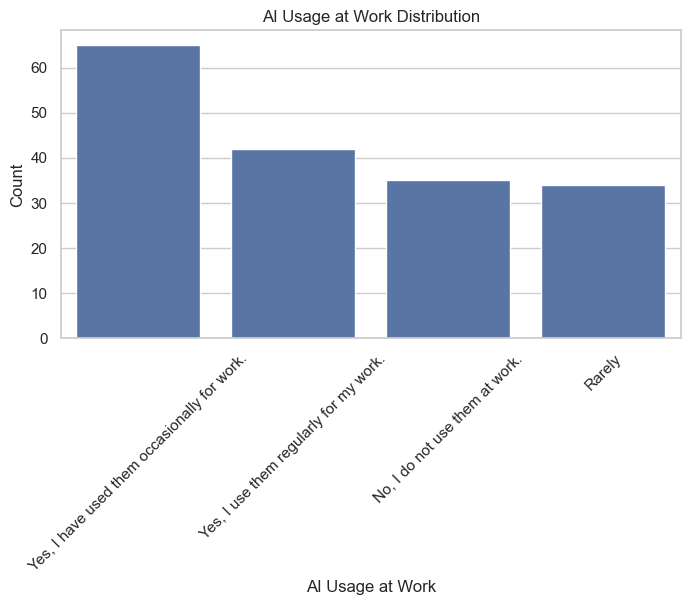

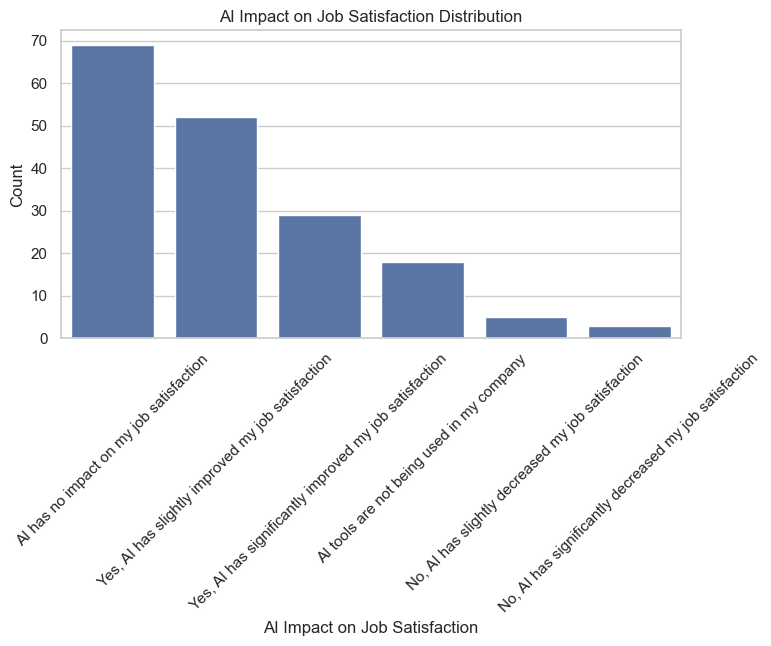

In [44]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot Job Satisfaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='Job_Satisfaction', order=df_analysis['Job_Satisfaction'].value_counts().index)
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot Company Size
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='Company_Size', order=df_analysis['Company_Size'].value_counts().index)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot AI Usage at Work
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='AI_Usage_Work', order=df_analysis['AI_Usage_Work'].value_counts().index)
plt.title('AI Usage at Work Distribution')
plt.xlabel('AI Usage at Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot AI Impact on Job Satisfaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df_analysis, x='AI_Impact_Job_Satisfaction', order=df_analysis['AI_Impact_Job_Satisfaction'].value_counts().index)
plt.title('AI Impact on Job Satisfaction Distribution')
plt.xlabel('AI Impact on Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Assigning numerical values to the categorical responses 

SME categorizes small businesses as companies with 1-49 employees, medium businesses have between 50-250 employees, and large businesses have 250+ employees. 

In [45]:
job_satisfaction = {
    'Extremely dissatisfied': 1,
    'Somewhat dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Somewhat satisfied': 4,
    'Extremely satisfied': 5
}

company_size_category = {
    'Fewer than 5 employees': 1,
    'Fewer than 10 employees': 1,
    '10-49 employees': 1,
    '50-100 employees': 2,
    '101-250 employees': 2,
    'More than 250 employees': 3,
    '1 employee': 1,
    'I do not know': 0  # or exclude this row from your analysis
}

ai_usage = {
    'No, I do not use them at work.': 1,
    'Rarely': 2,
    'Yes, I have used them occasionally for work.': 3,
    'Yes, I use them regularly for my work.': 4
}

ai_impact = {
    'No, AI has significantly decreased my job satisfaction': 1,
    'No, AI has slightly decreased my job satisfaction': 2,
    'AI has no impact on my job satisfaction': 3,
    'Yes, AI has slightly improved my job satisfaction': 4,
    'Yes, AI has significantly improved my job satisfaction': 5,
    'AI tools are not being used in my company': 0  # or exclude this
}

# Replace categorical values with numerical values
df_analysis['Job_Satisfaction'] = df_analysis['Job_Satisfaction'].replace(job_satisfaction)
df_analysis['Company_Size'] = df_analysis['Company_Size'].replace(company_size_category)
df_analysis['AI_Usage_Work'] = df_analysis['AI_Usage_Work'].replace(ai_usage)
df_analysis['AI_Impact_Job_Satisfaction'] = df_analysis['AI_Impact_Job_Satisfaction'].replace(ai_impact)

# Check the updated DataFrame
print(df_analysis.head())

   Job_Satisfaction  Company_Size  AI_Usage_Work  AI_Impact_Job_Satisfaction
0                 3             1              3                           5
1                 3             3              2                           3
2                 5             3              3                           4
3                 4             2              4                           2
4                 4             3              1                           3


/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_71961/2063429244.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analysis['Job_Satisfaction'] = df_analysis['Job_Satisfaction'].replace(job_satisfaction)
/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_71961/2063429244.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Job_Satisfaction'] = df_analysis['Job_Satisfaction'].replace(job_satisfaction)
/var/folders/kz/slhyr0gd4qj4nrryyswvqv4c0000gn/T/ipykernel_71961/2063429244.py:38:

In [46]:
# Count the number of rows in 'Company_Size' that contain the value 0
zero_count = (df_analysis['Company_Size'] == 0).sum()
print(f"Number of rows with '0' in Company_Size: {zero_count}")

# Count the number of rows in 'Company_Size' that contain the value 0
zero_count = (df_analysis['AI_Impact_Job_Satisfaction'] == 0).sum()
print(f"Number of rows with '0' in AI_Impact_Job_Satisfaction: {zero_count}")



Number of rows with '0' in Company_Size: 5
Number of rows with '0' in AI_Impact_Job_Satisfaction: 18


In [47]:
# Examine rows with 0 in 'Company_Size'
rows_with_zero_company_size = df_analysis[df_analysis['Company_Size'] == 0]
print(rows_with_zero_company_size)

# Examine rows with 0 in 'AI_Impact_Job_Satisfaction'
rows_with_zero_ai_impact = df_analysis[df_analysis['AI_Impact_Job_Satisfaction'] == 0]
print(rows_with_zero_ai_impact)


     Job_Satisfaction  Company_Size  AI_Usage_Work  AI_Impact_Job_Satisfaction
8                   4             0              4                           4
37                  2             0              1                           0
70                  3             0              1                           3
116                 4             0              4                           3
149                 4             0              3                           4
     Job_Satisfaction  Company_Size  AI_Usage_Work  AI_Impact_Job_Satisfaction
12                  3             1              1                           0
19                  4             1              2                           0
25                  3             1              1                           0
27                  4             2              1                           0
37                  2             0              1                           0
38                  4             2              1  

In [50]:
# Remove rows where Company_Size is 0
df_analysis = df_analysis[df_analysis['Company_Size'] != 0]

In [52]:
# Descriptive statistics
descriptive_stats = df_analysis.describe(include='all')
print(descriptive_stats)


       Job_Satisfaction  Company_Size  AI_Usage_Work  \
count        171.000000    171.000000     171.000000   
mean           3.836257      1.649123       2.649123   
std            0.905588      0.698517       1.043037   
min            1.000000      1.000000       1.000000   
25%            3.000000      1.000000       2.000000   
50%            4.000000      2.000000       3.000000   
75%            4.000000      2.000000       3.000000   
max            5.000000      3.000000       4.000000   

       AI_Impact_Job_Satisfaction  
count                  171.000000  
mean                     3.269006  
std                      1.379739  
min                      0.000000  
25%                      3.000000  
50%                      3.000000  
75%                      4.000000  
max                      5.000000  


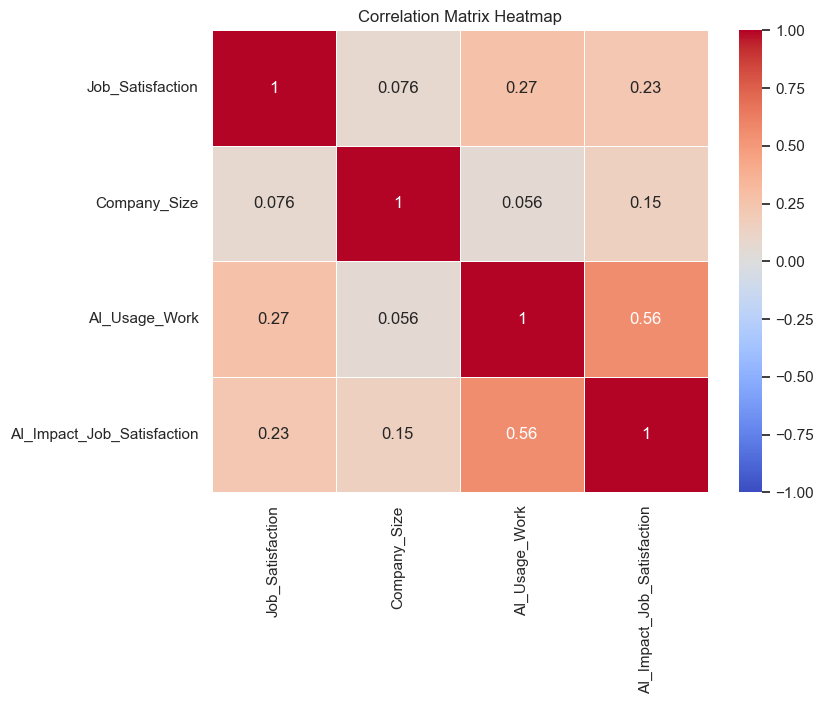

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_analysis[['Job_Satisfaction', 'Company_Size', 'AI_Usage_Work', 'AI_Impact_Job_Satisfaction']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()


In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA to test relationship between Job Satisfaction and AI Usage
model_ai_usage = ols('Job_Satisfaction ~ C(AI_Usage_Work)', data=df_analysis).fit()
anova_ai_usage = sm.stats.anova_lm(model_ai_usage, typ=2)

print(anova_ai_usage)


                      sum_sq     df         F    PR(>F)
C(AI_Usage_Work)   11.023092    3.0  4.779256  0.003196
Residual          128.392112  167.0       NaN       NaN


In [56]:
# Perform two-way ANOVA to compare Job Satisfaction between AI Usage and Company Size
model_two_way = ols('Job_Satisfaction ~ C(AI_Usage_Work) * C(Company_Size)', data=df_analysis).fit()
anova_two_way = sm.stats.anova_lm(model_two_way, typ=2)

print(anova_two_way)


                                      sum_sq     df         F    PR(>F)
C(AI_Usage_Work)                   10.665337    3.0  4.625319  0.003947
C(Company_Size)                     0.654630    2.0  0.425847  0.653959
C(AI_Usage_Work):C(Company_Size)    5.526904    6.0  1.198448  0.309838
Residual                          122.210578  159.0       NaN       NaN


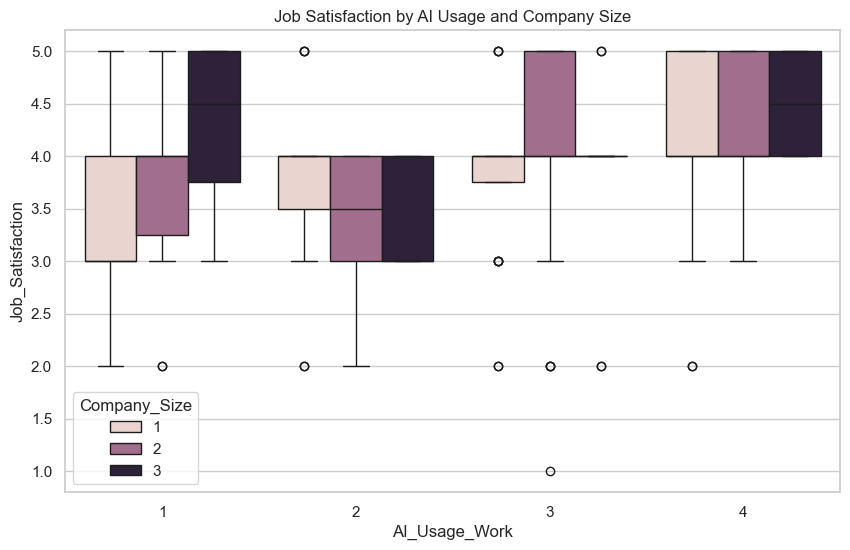

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize Job Satisfaction based on AI Usage and Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI_Usage_Work', y='Job_Satisfaction', hue='Company_Size', data=df_analysis)
plt.title('Job Satisfaction by AI Usage and Company Size')
plt.show()


In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test for pairwise comparisons
tukey = pairwise_tukeyhsd(endog=df_analysis['Job_Satisfaction'],
                          groups=df_analysis['AI_Usage_Work'],
                          alpha=0.05)

# Display the results of the Tukey HSD test
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0428 0.9972 -0.5133 0.5988  False
     1      3   0.3295 0.2995 -0.1581 0.8172  False
     1      4   0.6795 0.0065  0.1444 1.2146   True
     2      3   0.2868 0.4154 -0.1961 0.7697  False
     2      4   0.6368 0.0116   0.106 1.1675   True
     3      4     0.35 0.1995 -0.1086 0.8086  False
---------------------------------------------------


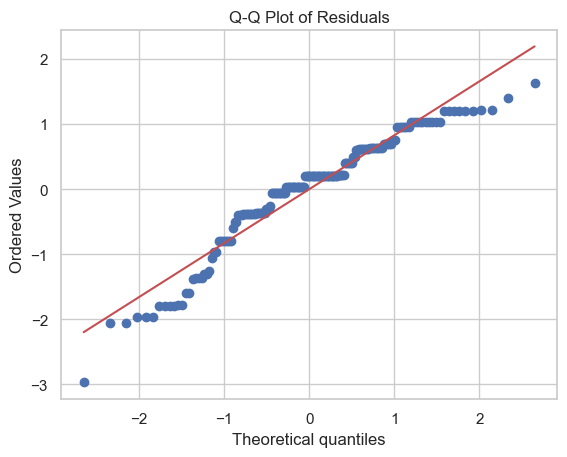

In [60]:
# Q-Q plot to check normality of residuals
residuals = model_two_way.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [61]:
from scipy.stats import levene

# Levene’s test for homogeneity of variances
stat, p_value = levene(df_analysis['Job_Satisfaction'], df_analysis['AI_Usage_Work'], center='mean')
print(f'Levene’s test p-value: {p_value}')

Levene’s test p-value: 0.00038069700866770424


<Figure size 1000x600 with 0 Axes>

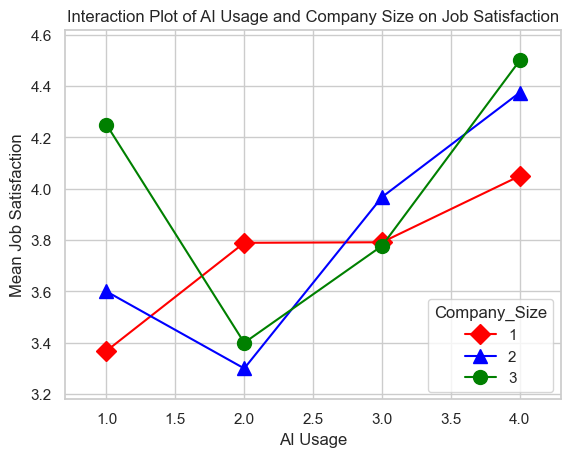

In [62]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot

# Create interaction plot
plt.figure(figsize=(10, 6))
interaction_plot(df_analysis['AI_Usage_Work'], df_analysis['Company_Size'], df_analysis['Job_Satisfaction'], 
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10)

plt.title('Interaction Plot of AI Usage and Company Size on Job Satisfaction')
plt.xlabel('AI Usage')
plt.ylabel('Mean Job Satisfaction')
plt.show()


In [63]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for AI Usage and Company Size
contingency_table = pd.crosstab(df_analysis['AI_Usage_Work'], df_analysis['Company_Size'])

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 5.90498386011637, p-value: 0.43391769180194373
